In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
desc=pd.read_excel("E Commerce Dataset.xlsx",sheet_name="Data Dict",header=1, usecols=[1,2,3])
data=pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

In [3]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [39]:
copy=data.copy()
copy.drop(['CustomerID','CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'Gender',
       'PreferredLoginDevice', 'PreferedOrderCat', 'PreferredPaymentMode', 'PreferedOrderCat'],axis=1,inplace=True)
copy=pd.get_dummies(copy)
copy.replace({True:1, False:0},inplace=True)
copy.drop('MaritalStatus_Divorced',axis=1,inplace=True)
copy

,Churn,Tenure,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,1,5.0,159.93,0,1
1,1,NaN,8.0,1,0.0,120.90,0,1
2,1,NaN,30.0,1,3.0,120.28,0,1
3,1,0.0,15.0,0,3.0,134.07,0,1
4,1,0.0,12.0,0,3.0,129.60,0,1
...,...,...,...,...,...,...,...,...
5625,0,10.0,30.0,0,4.0,150.71,1,0
5626,0,13.0,13.0,0,NaN,224.91,1,0
5627,0,1.0,11.0,1,4.0,186.42,1,0
5628,0,23.0,9.0,0,9.0,178.90,1,0


In [19]:
copy.fillna(copy.mean(),inplace=True)
copy.head()

,Churn,Tenure,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,6.0,1,5.0,159.93,0,1
1,1,10.189899,8.0,1,0.0,120.90,0,1
2,1,10.189899,30.0,1,3.0,120.28,0,1
3,1,0.000000,15.0,0,3.0,134.07,0,1
4,1,0.000000,12.0,0,3.0,129.60,0,1


In [20]:
x=copy.drop('Churn',axis=1)
x.head()

,Tenure,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,6.0,1,5.0,159.93,0,1
1,10.189899,8.0,1,0.0,120.90,0,1
2,10.189899,30.0,1,3.0,120.28,0,1
3,0.000000,15.0,0,3.0,134.07,0,1
4,0.000000,12.0,0,3.0,129.60,0,1


In [21]:
y=copy['Churn']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

## Using Decision Tree Classifier

In [23]:
model_dt=DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=8, min_samples_leaf=8)

In [24]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [25]:
y_pred_dt=model_dt.predict(x_test)

In [26]:
y_pred_dt

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
print("Accuracy:", round(model_dt.score(x_test, y_test), 2))
print(classification_report(y_test,y_pred_dt, labels=[0,1]))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1424
           1       0.67      0.50      0.57       265

    accuracy                           0.88      1689
   macro avg       0.79      0.73      0.75      1689
weighted avg       0.87      0.88      0.88      1689



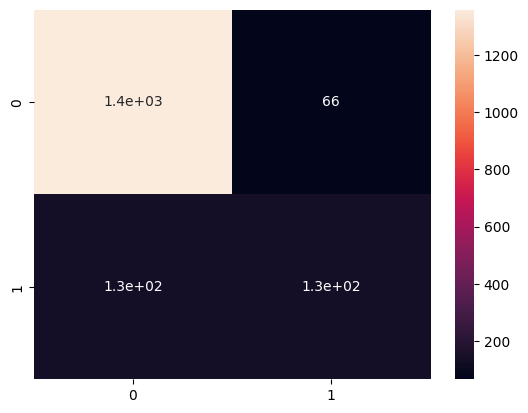

In [28]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True)
plt.show()

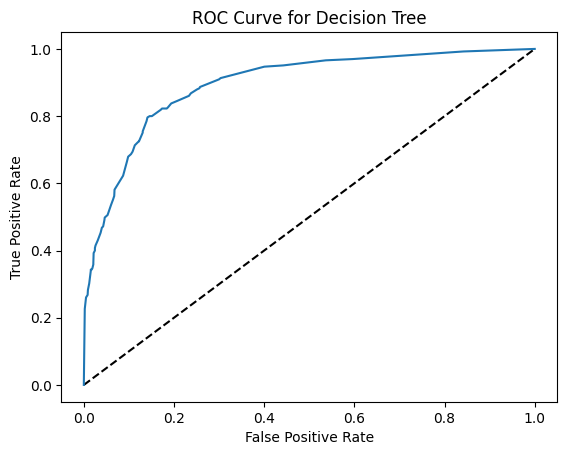

In [29]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_dt = model_dt.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()

## Using Random Forest Classifier

In [30]:
model_rf=RandomForestClassifier(criterion='gini',random_state=42,max_depth=8,min_samples_leaf=8)

In [31]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [32]:
y_pred_rf=model_rf.predict(x_test)

In [33]:
y_pred_rf

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
print("Accuracy:", round(model_rf.score(x_test, y_test), 2))
print(classification_report(y_test,y_pred_rf, labels=[0,1]))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1424
           1       0.70      0.56      0.62       265

    accuracy                           0.89      1689
   macro avg       0.81      0.76      0.78      1689
weighted avg       0.89      0.89      0.89      1689



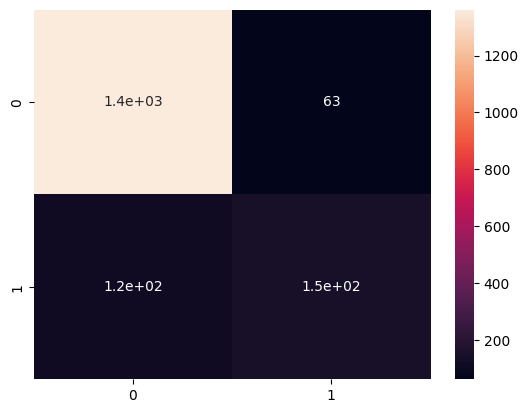

In [35]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True)
plt.show()

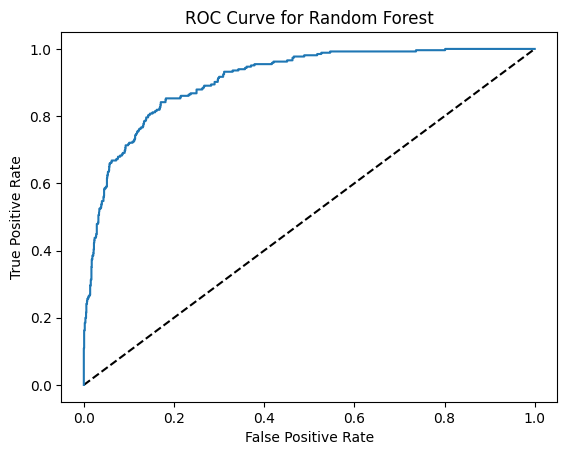

In [36]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rf = model_rf.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

we can see that random forest classifier is better for classification of customers of so we wil use it as our model.

In [37]:
import pickle
pickle.dump(model_rf, open('model.pkl','wb'))